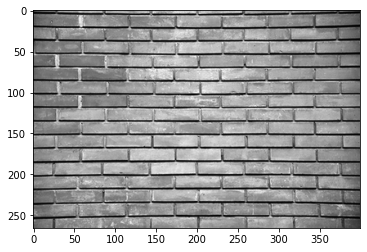

In [2]:
# import the necessary packages
import cv2
from matplotlib import pyplot as plt

# load the image and convert it to grayscale
image = cv2.imread("bricks.png")
gray  = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor( gray, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
# compute gradients along the X and Y axis, respectively
gX = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=0, dy=1)

# the `gX` and `gY` images are now of the floating point data type,
# so we need to take care to convert them back to an unsigned 8-bit
# integer representation so other OpenCV functions can utilize them
gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)


 Sobel X



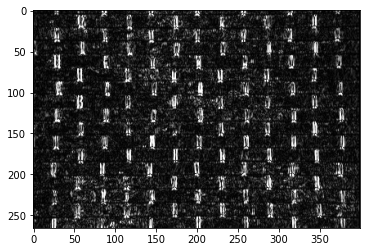


 Sobel Y



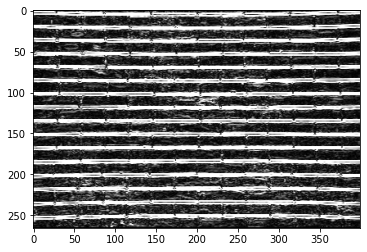


 Sobel Combined



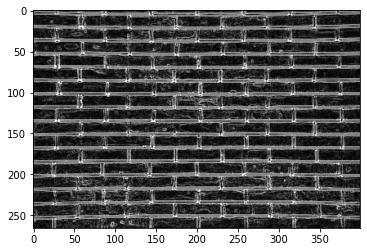

In [4]:
# combine the sobel X and Y representations into a single image
sobelCombined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

# show our output images
print('\n Sobel X\n')
plt.imshow(cv2.cvtColor( gX, cv2.COLOR_BGR2RGB))
plt.show()

print('\n Sobel Y\n')
plt.imshow(cv2.cvtColor( gY, cv2.COLOR_BGR2RGB))
plt.show()

print('\n Sobel Combined\n')
plt.imshow(cv2.cvtColor( sobelCombined, cv2.COLOR_BGR2RGB))
plt.show()

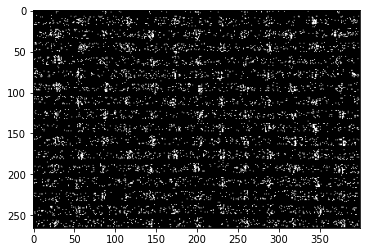

In [5]:
# import the necessary packages
import numpy as np

# compute gradients along the X and Y axis, respectively
gX = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=1, dy=0)
gY = cv2.Sobel(gray, ddepth=cv2.CV_64F, dx=0, dy=1)

# construct the argument parser and parse the arguments
lower_angle = 160
upper_angle = 190

# compute the gradient magnitude and orientation respectively
mag = np.sqrt((gX ** 2) + (gY ** 2))
orientation = np.arctan2(gY, gX) * (180 / np.pi) % 180

# find all pixels that are within the upper and low angle boundaries
idxs = np.where(orientation >= lower_angle, orientation, -1)
idxs = np.where(orientation <= upper_angle, idxs,        -1)
mask = np.zeros(gray.shape, dtype="uint8")
mask[idxs > -1] = 255

# show the images
plt.imshow(cv2.cvtColor( mask, cv2.COLOR_BGR2RGB))
plt.show()

# Edge Detection



 Wide Edge Map 



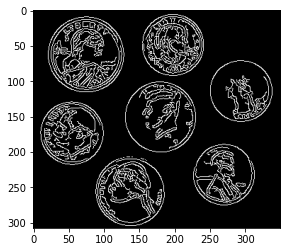


 Mid Edge Map 



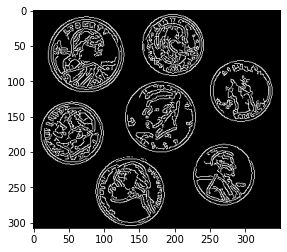


 Tight Edge Map 



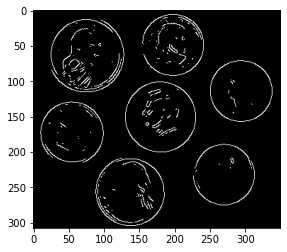

In [7]:
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread('coins01.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)


# compute a "wide", "mid-range", and "tight" threshold for the edges
wide  = cv2.Canny(blurred, 10, 200)
mid   = cv2.Canny(blurred, 30, 150)
tight = cv2.Canny(blurred, 240, 250)

# show the edge maps
print('\n Wide Edge Map \n')
plt.imshow(cv2.cvtColor( wide, cv2.COLOR_BGR2RGB))
plt.show()

print('\n Mid Edge Map \n')
plt.imshow(cv2.cvtColor( mid, cv2.COLOR_BGR2RGB))
plt.show()

print('\n Tight Edge Map \n')
plt.imshow(cv2.cvtColor( tight, cv2.COLOR_BGR2RGB))
plt.show()

# Automatically tuning edge detection parameters


 Auto Canny 



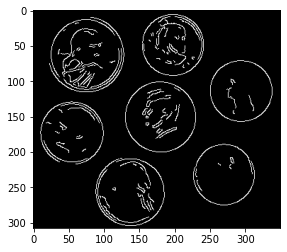

In [8]:
import imutils

auto = imutils.auto_canny(blurred)
print('\n Auto Canny \n')
plt.imshow(cv2.cvtColor( auto, cv2.COLOR_BGR2RGB))
plt.show()


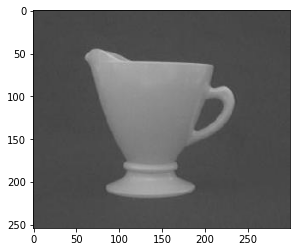


 Wide Edge Map 



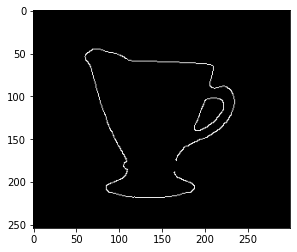


 Mid Edge Map 



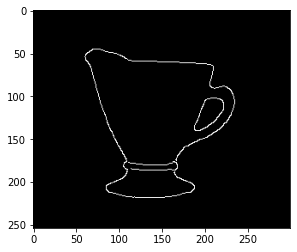


 Tight Edge Map 



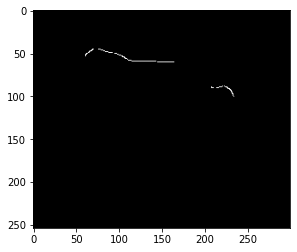


 Auto Canny 



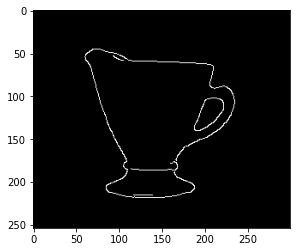

In [9]:
# load the image, convert it to grayscale, and blur it slightly
image = cv2.imread('teacup.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)


# compute a "wide", "mid-range", and "tight" threshold for the edges
wide  = cv2.Canny(blurred, 10, 200)
mid   = cv2.Canny(blurred, 30, 150)
tight = cv2.Canny(blurred, 240, 250)

# original
plt.imshow(cv2.cvtColor( image, cv2.COLOR_BGR2RGB))
plt.show()

# show the edge maps
print('\n Wide Edge Map \n')
plt.imshow(cv2.cvtColor( wide, cv2.COLOR_BGR2RGB))
plt.show()

print('\n Mid Edge Map \n')
plt.imshow(cv2.cvtColor( mid, cv2.COLOR_BGR2RGB))
plt.show()

print('\n Tight Edge Map \n')
plt.imshow(cv2.cvtColor( tight, cv2.COLOR_BGR2RGB))
plt.show()

auto = imutils.auto_canny(blurred)
print('\n Auto Canny \n')
plt.imshow(cv2.cvtColor( auto, cv2.COLOR_BGR2RGB))
plt.show()